![Image](./img/dataset-diagram-logo.png)


**objectif** : pandas like but for **ndim**

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

ModuleNotFoundError: No module named 'xarray'

In [ ]:
truc = xr.DataArray(np.random.randint(2, 3))
truc

In [ ]:
data = xr.DataArray(np.random.randint(6, size=(2, 3)), coords={'x': ['a', 'b']}, dims=('x', 'y'))
data

In [ ]:
xr.DataArray(pd.Series(range(3), index=list('abc'), name='foo'))

## Attribute of DataArray

In [5]:
print('values : ', data.values)
print('dims : ', data.dims)
print('coords : ', data.coords)
print('attrs metadata', data.attrs)

values :  [[0 5 0]
 [1 1 1]]
dims :  ('x', 'y')
coords :  Coordinates:
  * x        (x) <U1 'a' 'b'
attrs metadata {}


## Indexing

### numpy like

In [6]:
data[:, :2]

<xarray.DataArray (x: 2, y: 2)>
array([[0, 5],
       [1, 1]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### pandas like with loc[]

In [7]:
data.loc[['a', 'b'], :]

<xarray.DataArray (x: 2, y: 3)>
array([[0, 5, 0],
       [1, 1, 1]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with isel()

In [8]:
data.isel(y=[0, 2])

<xarray.DataArray (x: 2, y: 2)>
array([[0, 0],
       [1, 1]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

### with sel()

In [9]:
data.sel(x=['a'])

<xarray.DataArray (x: 1, y: 3)>
array([[0, 5, 0]])
Coordinates:
  * x        (x) <U1 'a'
Dimensions without coordinates: y

## Attributes (metadata) usefull for protting

In [10]:
data.attrs['long_name'] = 'random unseless stuff'
data.attrs['units'] = 'mV'
data

<xarray.DataArray (x: 2, y: 3)>
array([[0, 5, 0],
       [1, 1, 1]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

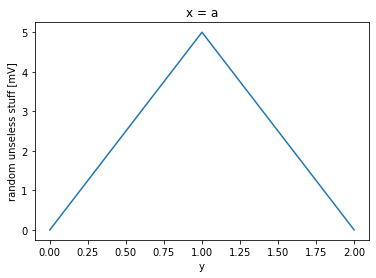

In [11]:
data.sel(x='a').plot()

## Computation / aggregation

In [12]:
# mais on peut utiliser les noms des axes au lieu de leur numéro
data.mean(dim='y')

<xarray.DataArray (x: 2)>
array([1.66666667, 1.        ])
Coordinates:
  * x        (x) <U1 'a' 'b'

## GroupBy

In [13]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[0, 5, 0],
       [1, 1, 1]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y
Attributes:
    long_name:  random unseless stuff
    units:      mV

In [14]:
labels = xr.DataArray(['E', 'F', 'E'], coords = [data.coords['y']], name='labels')
labels

<xarray.DataArray 'labels' (y: 3)>
array(['E', 'F', 'E'], dtype='<U1')
Coordinates:
  * y        (y) int64 0 1 2

In [15]:
data1 = data.groupby(labels).sum('y')
data1

<xarray.DataArray (x: 2, labels: 2)>
array([[0, 5],
       [2, 1]])
Coordinates:
  * x        (x) <U1 'a' 'b'
  * labels   (labels) object 'E' 'F'

In [16]:
data2 = data.groupby(labels).apply(lambda x: x - x.min())
data2

<xarray.DataArray (x: 2, y: 3)>
array([[0, 4, 0],
       [1, 0, 1]])
Coordinates:
  * x        (x) <U1 'a' 'b'
Dimensions without coordinates: y

## Pandas

In [17]:
series = data.to_series()
series

x  y
a  0    0
   1    5
   2    0
b  0    1
   1    1
   2    1
dtype: int64

In [18]:
series.to_xarray()

<xarray.DataArray (x: 2, y: 3)>
array([[0, 5, 0],
       [1, 1, 1]])
Coordinates:
  * x        (x) object 'a' 'b'
  * y        (y) int64 0 1 2

## Dataset = DataArray in the same place

In [19]:
times = np.arange(0, 10, 0.01)
freqs = np.arange(10, 50, 2.)

data1 = xr.DataArray(np.random.randn(times.size),
                     coords={'times': times},
                     dims=('times'))

data2 = xr.DataArray(np.random.randn(times.size, freqs.size),
                     coords={'times': times, 'freqs': freqs},
                     dims=('times', 'freqs'))



ds = xr.Dataset({'raw_signal': data1,
                 'time_freq' : data2,
                 'one_scalar': np.pi})
ds

<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 -0.03262 -0.1557 -0.4247 ... 1.239 -0.1376
    time_freq   (times, freqs) float64 -0.144 0.561 0.3419 ... -1.195 -0.3106
    one_scalar  float64 3.142

In [20]:
ds['raw_signal']

<xarray.DataArray 'raw_signal' (times: 1000)>
array([-3.26192456e-02, -1.55716194e-01, -4.24698240e-01,  6.82831848e-01,
        6.92493853e-01,  9.19591950e-01,  1.06283298e-01,  1.80726240e-01,
       -6.38422842e-02, -2.17526016e+00,  6.04448459e-01, -1.18703515e+00,
        3.77453649e-01, -7.95356334e-01, -2.08534062e+00, -7.45078966e-01,
        1.55268942e+00, -9.03210976e-01,  3.28016776e-01, -7.58528131e-01,
       -1.37857538e+00,  9.49697429e-01,  1.53774947e-01, -7.92898096e-01,
        3.61847446e-01, -1.59169595e-01,  7.73737894e-01, -1.11412610e+00,
       -2.10822357e-01, -3.97063565e-01, -2.31893375e+00, -9.25894423e-01,
        8.14500946e-02,  4.18036753e-01,  7.70389187e-02,  2.13804247e+00,
       -4.47165244e-01, -7.47801556e-01,  1.17664662e+00, -2.06306881e-01,
       -8.81057848e-02, -1.36268350e+00,  2.39456467e-01,  2.00699144e+00,
       -3.04088543e-01, -1.97362082e+00,  1.09551149e+00, -4.30341874e-01,
        1.24781819e-01, -8.82329503e-01, -2.57408398e-01, -2.73337452e-02,
       -1.50170148e+00, -6.14213264e-01,  3.18712397e-01,  4.84684870e-01,
       -2.22360762e-01,  6.52433011e-01, -1.61763916e+00,  4.07439981e-01,
        5.27887260e-01, -1.19133440e+00,  2.65750426e-01, -9.83285822e-01,
       -5.29685416e-01,  9.15412129e-01,  5.36816105e-01, -8.11813469e-01,
       -1.22598589e+00,  1.31977915e+00, -3.49176269e-02,  8.57378709e-01,
        1.37997683e+00, -9.78019496e-02, -3.32599535e+00, -7.82656501e-01,
        1.00752718e+00, -5.86515895e-01,  7.14742346e-01,  1.67150266e+00,
...
        2.11763992e+00, -3.74820214e-01,  7.67786567e-02, -4.23793881e-01,
        2.79360832e-01, -1.04405897e-01, -2.60060220e-01,  1.09277340e+00,
        8.93035600e-01, -1.17344488e+00, -2.95986240e-01, -3.35800899e-01,
        1.55827214e+00, -1.06290255e+00, -4.97439341e-01,  3.54667787e-01,
       -5.89171255e-01, -1.13272709e+00,  3.31314942e-01,  6.60178281e-01,
       -1.34871139e+00,  5.41787282e-01,  5.42183023e-01, -1.02947271e-01,
        9.03165254e-01,  5.07556321e-01, -8.94048802e-01, -6.79035662e-01,
       -6.62888429e-01,  1.20572641e+00,  2.35824085e-01,  8.66152713e-01,
       -9.75315840e-01,  1.34906422e+00, -1.86577857e-01,  1.92674924e+00,
        7.72368870e-01,  8.89428151e-01, -9.49934137e-01, -9.24308805e-01,
       -1.07054937e+00,  2.07051748e+00,  1.91139103e+00, -1.29402918e-01,
       -1.25352300e+00, -1.33345223e+00, -1.26123043e+00, -9.75665006e-01,
        5.58529897e-01,  5.61718420e-02,  1.30755349e+00, -2.31466091e-01,
        7.61087915e-01, -9.64331841e-01, -7.67599582e-01, -8.97979962e-02,
       -9.89863347e-01,  1.61043603e+00,  1.11057348e+00, -2.24035862e-01,
       -8.47248036e-02, -2.36402720e-01,  1.55101545e+00, -5.66836441e-01,
        1.08721093e-03,  5.05003101e-01, -1.89066522e+00, -8.78426096e-01,
       -1.21871443e+00,  6.03382995e-01, -1.09115962e+00,  1.74602468e-01,
       -4.73872742e-02,  6.50302733e-01,  4.91973584e-01, -6.12202611e-02,
       -5.33473399e-01,  8.69050602e-01,  1.23895512e+00, -1.37563513e-01])
Coordinates:
  * times    (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99

In [21]:
ds.isel(times=slice(0,100))

<xarray.Dataset>
Dimensions:     (freqs: 20, times: 100)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 0.96 0.97 0.98 0.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 -0.03262 -0.1557 -0.4247 ... 0.3564 -0.1388
    time_freq   (times, freqs) float64 -0.144 0.561 0.3419 ... -0.2767 0.6062
    one_scalar  float64 3.142

## NetCDF

In [22]:
ds.to_netcdf('example.nc')

In [23]:
xr.open_dataset('example.nc')

<xarray.Dataset>
Dimensions:     (freqs: 20, times: 1000)
Coordinates:
  * times       (times) float64 0.0 0.01 0.02 0.03 0.04 ... 9.96 9.97 9.98 9.99
  * freqs       (freqs) float64 10.0 12.0 14.0 16.0 18.0 ... 42.0 44.0 46.0 48.0
Data variables:
    raw_signal  (times) float64 ...
    time_freq   (times, freqs) float64 ...
    one_scalar  float64 ...

## Exercice 1

 * Explorer le dossier `data/data_folder`
 * Créer un DataSet/DataArray pour organiser les datas de manieres multi dimensionel
 
 Chaque tableau `*.npy` a pour shape `(4, 3)`
 On peut considerer ces dimenssion comme `(trial, question)` avec trial de 0 à 4 and question 'a', 'b', 'c'

In [13]:
import xarray as xr

ModuleNotFoundError: No module named 'xarray'

## Solution 1

In [5]:
!ls -r data/data_folder/*

data/data_folder/UJ03:
session_5.npy
session_4.npy
session_3.npy
session_2.npy
session_1.npy

data/data_folder/ST01:
session_5.npy
session_4.npy
session_3.npy
session_2.npy
session_1.npy

data/data_folder/LM04:
session_5.npy
session_4.npy
session_3.npy
session_2.npy
session_1.npy

data/data_folder/HJ02:
session_5.npy
session_4.npy
session_3.npy
session_2.npy
session_1.npy


In [11]:
from pathlib import Path
folder = Path('data/data_folder')

subjects = [f.stem for f in folder.iterdir()]
print(subjects)

sessions = [int(f.stem.replace('session_', '')) for f in (folder / subjects[0]).iterdir()]
sessions = sorted(sessions)
sessions
# mydata = {}
# for file_path in folder.glob('**/*.npy'):
#     subject = file_path.parents[0].stem
#     session = int(file_path.stem.replace('session_', ''))
#     if subject not in mydata:
#         mydata[subject] = {}
#     arr = np.load(file_path)
# mydata


['HJ02', 'LM04', 'ST01', 'UJ03']


[1, 2, 3, 4, 5]

In [12]:
coords = {
    'subjects' : subjects,
    'sessions' : sessions,
    'trial' : np.arange(4),
    'questions' : np.array(['a', 'b', 'c'])
}
data = xr.DataArray(coords=coords, dims=['subjects', 'sessions', 'trial','questions'])
data



NameError: name 'xr' is not defined

In [27]:
for subject in subjects:
    for session in sessions:
        file_path = folder / subject / f'session_{session}.npy'
        np_arr = np.load(file_path)
        data.loc[subject, session, :, :] = np_arr

data

<xarray.DataArray (subjects: 4, sessions: 5, trial: 4, questions: 3)>
array([[[[ 2.22818769, -0.50955824,  0.03992623],
         [ 0.41742752, -2.01602787, -0.21802683],
         [ 0.47037164,  0.74212077,  0.34622762],
         [ 0.77117791, -2.02967243, -0.57107898]],

        [[ 0.39786945,  0.61703221,  0.15183394],
         [-0.43560855, -0.35867696,  1.34792642],
         [ 1.2627654 , -1.01953818,  1.44585437],
         [ 0.89007494,  0.61240892,  0.02416696]],

        [[ 2.52932469,  1.68744126,  1.94924154],
         [ 0.86571286,  0.87198381,  0.18029687],
         [ 2.25554749, -1.07055761, -0.48938934],
         [ 1.7422904 , -0.10962135,  1.14372104]],

        [[ 1.58631923, -0.72739628, -0.26158817],
         [ 2.56425695,  1.13199062,  0.54568674],
         [-0.49778992,  1.4074506 , -0.4162464 ],
         [ 1.55625927,  0.60217849,  0.3552943 ]],

...

        [[-1.37446607,  0.77471333, -3.32607595],
         [ 2.13101326,  0.20674242, -1.10742134],
         [-1.43194356,  2.15985496, -1.37384019],
         [ 0.85982173, -0.06844014, -0.1607968 ]],

        [[ 1.23919226, -0.12958547,  0.78818082],
         [-0.60837368,  0.07957184,  0.23778785],
         [ 0.71276165, -0.69707259,  0.87300822],
         [-0.31410541,  0.79037717, -3.23867177]],

        [[-0.92839649,  0.64171505, -0.71272713],
         [-0.24419653,  1.79090322,  0.50802894],
         [-0.05288209, -0.36533635,  0.10701192],
         [-0.26140426, -0.00484426,  0.15658016]],

        [[ 0.90662266,  2.23730039,  0.35461322],
         [ 0.09435512,  0.97716562, -0.94782627],
         [-0.23006766, -0.43436618, -1.27472078],
         [-0.22752045,  0.04854418, -0.15018364]]]])
Coordinates:
  * subjects   (subjects) <U4 'UJ03' 'LM04' 'HJ02' 'ST01'
  * sessions   (sessions) int64 1 2 3 4 5
  * trial      (trial) int64 0 1 2 3
  * questions  (questions) <U1 'a' 'b' 'c'

In [28]:
ds = xr.Dataset()
ds['data'] = data
ds.to_netcdf('mydata.nc')

In [29]:
ds = xr.open_dataset('mydata.nc')
ds['data']

<xarray.DataArray 'data' (subjects: 4, sessions: 5, trial: 4, questions: 3)>
array([[[[ 2.228188, ...,  0.039926],
         ...,
         [ 0.771178, ..., -0.571079]],

        ...,

        [[-1.451333, ..., -1.999803],
         ...,
         [-0.679311, ...,  0.095432]]],


       ...,


       [[[ 0.9871  , ...,  0.679914],
         ...,
         [-0.431825, ...,  0.515421]],

        ...,

        [[ 0.906623, ...,  0.354613],
         ...,
         [-0.22752 , ..., -0.150184]]]])
Coordinates:
  * subjects   (subjects) object 'UJ03' 'LM04' 'HJ02' 'ST01'
  * sessions   (sessions) int64 1 2 3 4 5
  * trial      (trial) int64 0 1 2 3
  * questions  (questions) object 'a' 'b' 'c'